In [1]:
#import module 
import pylab
import numpy as np
import pandas as pd
import statsmodels.api as sm 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('data/insurance2.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


# Logistic Regression


In [12]:
def log_regression(df, ycol = None, alpha = None):
    if alpha == None :
        alpha = 0.05
    #determine y and x variable     
    y = df[ycol]
    x = df.drop([ycol], axis = 1)
    #regression logistic
    model = sm.Logit(y,x)
    #regression 
    result = model.fit()
    #get p-values
    result             = round(result.pvalues,3)
    result             = pd.DataFrame(result, columns=['p_value'])
    result.index       = result.index.set_names(['features'])
    #result            = result.reset_index().rename(columns = {result.index.name : 'features'})
    result['alpha']    = alpha
    result['decision'] = np.where(result['p_value'] <= alpha, 'Correlated', 'Not Correlated')
    #result             = result['decision']
    
    return result 
    

In [13]:
log_regression(df, ycol = 'insuranceclaim')

Optimization terminated successfully.
         Current function value: 0.457311
         Iterations 7


,p_value,alpha,decision
features,,,
age,0.003,0.05,Correlated
sex,0.028,0.05,Correlated
bmi,0.000,0.05,Correlated
children,0.000,0.05,Correlated
smoker,0.000,0.05,Correlated
region,0.009,0.05,Correlated
charges,0.002,0.05,Correlated


# Linear Regression

In [14]:
df2 = pd.read_csv('data/data_startup.csv')
df2.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [15]:
df2 = df2.drop(['State'], axis = 1)

In [16]:
df2.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [17]:
def lin_regression(df, ycol = None, alpha=None):
    if alpha == None :
        alpha = 0.05 
    #determine y and x variable 
    y = df[ycol]
    x = df.drop([ycol], axis = 1)
    #build model 
    model = sm.OLS(y,x)
    #fit model OLS 
    result = model.fit()
    #get p-values
    result             = round(result.pvalues,3)
    result             = pd.DataFrame(result, columns=['p_value'])
    result.index       = result.index.set_names(['features'])
    #result            = result.reset_index().rename(columns = {result.index.name : 'features'})
    result['alpha']    = alpha
    result['decision'] = np.where(result['p_value'] <= alpha, 'Correlated', 'Not Correlated')
    #result             = result['decision']
    return result 

In [18]:
lin_regression(df2, ycol ='Profit')

,p_value,alpha,decision
features,,,
R&D Spend,0.000,0.05,Correlated
Administration,0.000,0.05,Correlated
Marketing Spend,0.001,0.05,Correlated


# normality test 

In [35]:
from scipy.stats import anderson, shapiro
from scipy import stats

In [36]:
#univariate normality test
stat, p = shapiro(df2[['Administration']])

In [37]:
columns = ['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']

In [38]:
def normality_test(df, methods = None , numerical_columns = None, alpha = None):
    if methods == None:
        methods = 'univariate'
    
    if alpha == None :
        alpha = 0.05
    
    if methods == 'univariate':
        _, p = shapiro(df[numerical_columns])
        print('P_value = %.2f' % (p))
        alpha = alpha 
        if p >= alpha :
            print('Sample looks Gaussian (fail to reject H0) : normal distribution')
        else:
            print('Sample does not look Gaussian (reject H0) : not normally distributed')
        
        #qqplot graph 
        plt.figure(figsize=(10,6))
        stats.probplot(df[numerical_columns], dist = "norm", plot=pylab)
        pylab.show()

    if methods == 'multivariate':
        columns = numerical_columns 
        result = []
        #for loop 
        for col in numerical_columns : 
            _, p = shapiro(df[col])
            p    = round(p,2)
            result.append(p)
        
        result = np.array(result)
        column = np.array(columns)
        table  = pd.DataFrame({'feature':column, 'p_value':result})
        table['alpha'] = 0.05
        table['decision'] = np.where(table['p_value'] >= 0.05,'normal distribution', 'not normally distributed')
                    
        return table 

P_value = 0.24
Sample looks Gaussian (fail to reject H0) : normal distribution


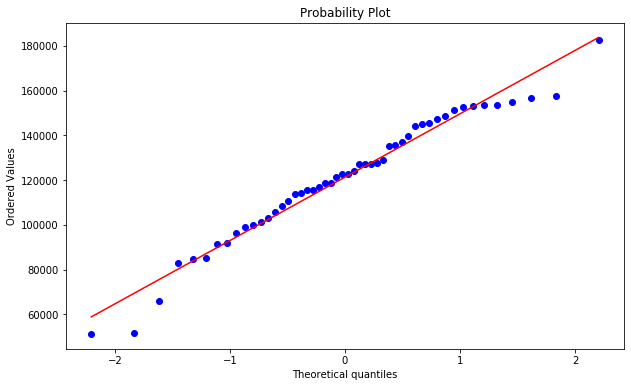

In [39]:
#univarite normality test
normality_test(df2, methods='univariate', numerical_columns='Administration')

In [40]:
#multivariate normality test 
normality_test(df2, methods='multivariate', numerical_columns = columns)

,feature,p_value,alpha,decision
0,R&D Spend,0.18,0.05,normal distribution
1,Administration,0.24,0.05,normal distribution
2,Marketing Spend,0.35,0.05,normal distribution
3,Profit,0.77,0.05,normal distribution
